# Setup

In [105]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

# Import Cleaned Reviews Data

## Reference

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

In [106]:
# Import the reviews data and filter it to include all rows of data 
# except for the current year (i.e., 2023), and then take a peek of the data
df = pd.read_csv('data/cleanedData_Reviews.csv');
df = df[df['Year of Review'] != 2023];
df = df.reset_index(drop=True);
print(df.info());
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Reviewer Name         324 non-null    object
 1   Reviewer Title        324 non-null    object
 2   Total Reviews Given   324 non-null    int64 
 3   Review                324 non-null    object
 4   Stars Given           324 non-null    int64 
 5   Year of Review        324 non-null    int64 
 6   Time of Review        324 non-null    object
 7   Webscraping Datetime  324 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.4+ KB
None


,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review,Time of Review,Webscraping Datetime
0,Alex Reyes,No Title,2,No Review,3,2022,a month ago,2023-01-29 20:55:10


# Exploratory Data Analysis

## Reference

https://stackoverflow.com/questions/58476654/how-to-remove-or-hide-x-axis-labels-from-a-seaborn-matplotlib-plot

https://www.w3schools.com/python/pandas/ref_df_set_index.asp

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

**Total Number of Reviews**

In [107]:
len(df)

324

**Distribution of Reviews by Stars Given**

In [108]:
df.groupby(by='Stars Given')['Total Reviews Given'].count()

Stars Given
1     58
2     13
3     20
4     53
5    180
Name: Total Reviews Given, dtype: int64

<AxesSubplot:title={'center':'Distribution of Reviews by Stars Given'}, xlabel='Stars Given', ylabel='Count'>

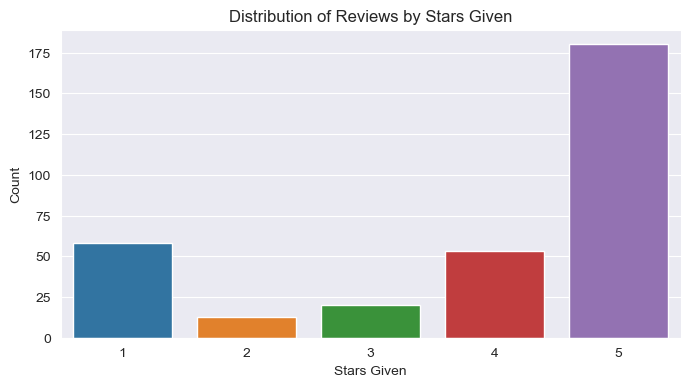

In [109]:
def chart_totalReviews_by_starsGiven(df_agg, title, ylabel):
    fig, ax = plt.subplots(figsize=(8,4));
    ax = sns.barplot(x=df_agg.index, y=df_agg.values);
    ax.set(ylabel=ylabel, title=title);
    return ax;

chart_totalReviews_by_starsGiven(
    df_agg=df.groupby(by='Stars Given')['Total Reviews Given'].count(),
    title='Distribution of Reviews by Stars Given',
    ylabel='Count'
)

**Reviews by Stars Given over the Years**

In [110]:
df.groupby(by=['Stars Given','Year of Review'])['Total Reviews Given'].count()

Stars Given  Year of Review
1            2019              11
             2020              12
             2021               6
             2022              29
2            2019               3
             2020               3
             2021               3
             2022               4
3            2019               2
             2020              10
             2022               8
4            2019              23
             2020              19
             2021               4
             2022               7
5            2019              47
             2020              80
             2021              17
             2022              36
Name: Total Reviews Given, dtype: int64

/var/folders/6l/mm7mjc7502v12t9w6jsrkdcr0000gn/T/ipykernel_2647/998992258.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(ylabel=ylabel, title=title, xticklabels=xticklabels);


<AxesSubplot:title={'center':'Reviews by Stars Given over the years'}, xlabel='Year of Review', ylabel='Count'>

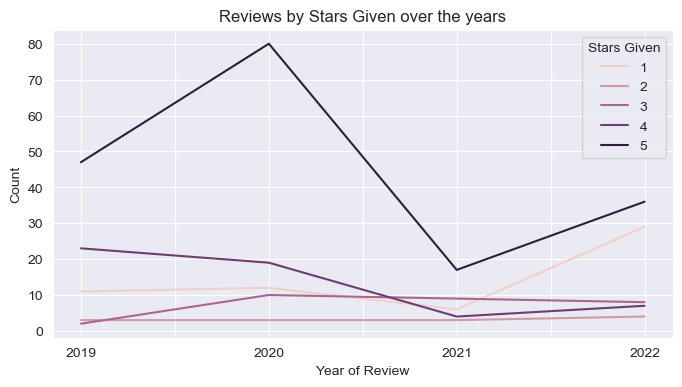

In [111]:
def chart_totalReviews_starsGiven_overTheYears(df_agg, title, ylabel, xticklabels):
    fig, ax = plt.subplots(figsize=(8,4));
    ax = sns.lineplot(data=df_agg, 
                        x=df_agg.index.names[1], 
                        y=df_agg.values, 
                        hue=df_agg.index.names[0]
                       );
    ax.set(ylabel=ylabel, title=title, xticklabels=xticklabels);
    return ax;


chart_totalReviews_starsGiven_overTheYears(
    df_agg=df.groupby(by=['Stars Given','Year of Review'])['Total Reviews Given'].count(),
    title='Reviews by Stars Given over the years',
    ylabel='Count',
    xticklabels=['','2019','','2020','','2021','','2022']
)

**Number of Reviews over the years**

In [112]:
df.groupby(by='Year of Review')['Total Reviews Given'].count()

Year of Review
2019     86
2020    124
2021     30
2022     84
Name: Total Reviews Given, dtype: int64

<AxesSubplot:title={'center':'Number of Reviews over the years'}, xlabel='Year of Review', ylabel='Count'>

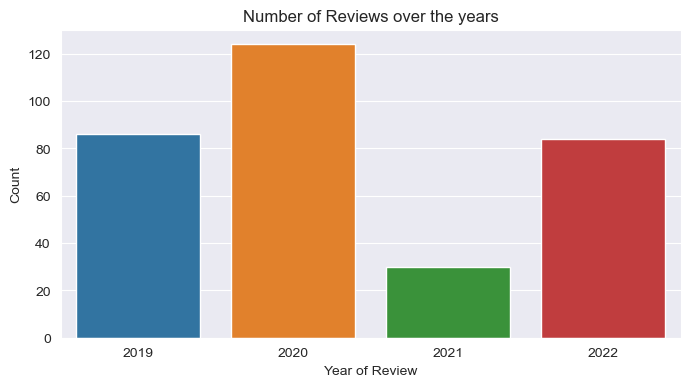

In [113]:
def chart_totalReviews_overTheYears(df_agg, title, ylabel):
    fig, ax = plt.subplots(figsize=(8,4));
    ax = sns.barplot(x=df_agg.index, y=df_agg.values);
    ax.set(ylabel=ylabel, title=title);
    return ax;

chart_totalReviews_overTheYears(
    df_agg=df.groupby(by='Year of Review')['Total Reviews Given'].count(), 
    title='Number of Reviews over the years', 
    ylabel='Count'
)

**Proportion of Reviewers with _Local Guide_ status**

In [114]:
df['Reviewer Title'].unique()

array(['No Title', 'Local Guide'], dtype=object)

In [115]:
def get_reviewerProportionByLocalGuideStatus(df, reviewer_title):
    title_count = 0;
    noTitle_count = 0;
    data = [];
    for i in df.index:
        if df.loc[i, 'Reviewer Title'] == reviewer_title:
            title_count += 1;
        else:
            noTitle_count += 1;
    data.append(['No',noTitle_count]);
    data.append(['Yes',title_count]);
    df_agg = pd.DataFrame(data, columns=[f'Is a {reviewer_title}','Count']);
    return df_agg;

get_reviewerProportionByLocalGuideStatus(
    df=df, 
    reviewer_title='Local Guide'
)

,Is a Local Guide,Count
0,No,122
1,Yes,202


<AxesSubplot:title={'center':'Proportion of Reviewers with "Local Guide" Status'}, xlabel='Is a Local Guide', ylabel='Count'>

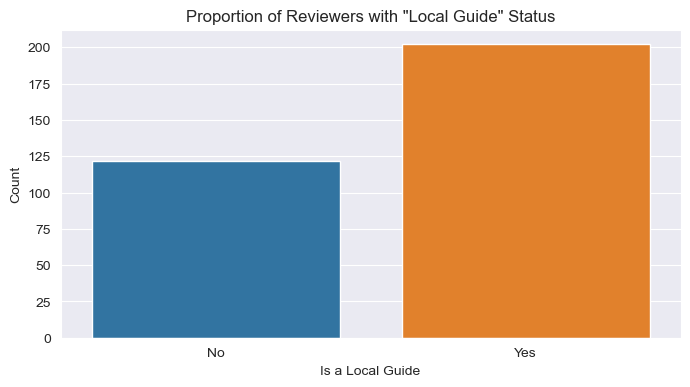

In [116]:
def chart_reviewerProportionByLocalGuideStatus(df, reviewer_title, title):
    df_agg = get_reviewerProportionByLocalGuideStatus(df, 'Local Guide');
    fig, ax = plt.subplots(figsize=(8,4));
    ax = sns.barplot(data=df_agg, x='Is a Local Guide', y='Count');
    ax.set(title=title);
    return ax;

chart_reviewerProportionByLocalGuideStatus(
    df=df, 
    reviewer_title='Local Guide', 
    title='Proportion of Reviewers with "Local Guide" Status'
)

**Stars Given for Reviewers with _Local Guide_ vs. _No Title_ status**

In [117]:
df.groupby(by=['Reviewer Title','Stars Given'])['Total Reviews Given'].count()

Reviewer Title  Stars Given
Local Guide     1               23
                2                5
                3               13
                4               40
                5              121
No Title        1               35
                2                8
                3                7
                4               13
                5               59
Name: Total Reviews Given, dtype: int64

<AxesSubplot:title={'center':'Stars Given by Reviewer Title'}, ylabel='Stars Given'>

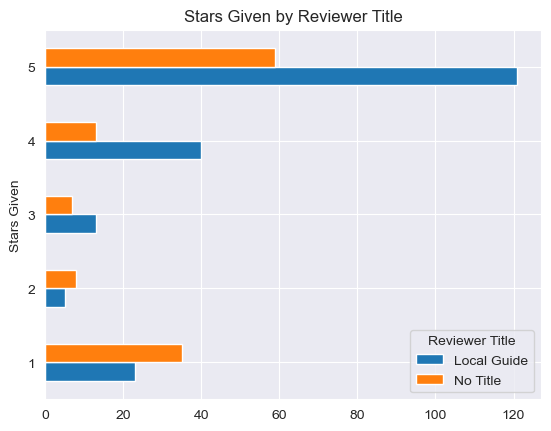

In [118]:
def chart_starsGiven_by_reviewerTitle(df_agg, title):
    chart = df_agg.unstack().plot(kind='barh');
    chart.set_title(title);
    return chart;

chart_starsGiven_by_reviewerTitle(
    df_agg=df.groupby(by=['Stars Given','Reviewer Title',]).size(),
    title="Stars Given by Reviewer Title"
)

**Proportion of Reviews Written to No Review**

In [119]:
def get_countOfReviewGiven(df):
    data = [];
    noReview_count = 0;
    review_count = 0;
    for i in df.index:
        if df.loc[i, 'Review'] == "No Review":
            noReview_count += 1;
        else:
            review_count += 1;
    data.append(['No Review Given', noReview_count]);
    data.append(['Review Given', review_count]);
    df_agg = pd.DataFrame(data, columns=['Review Given','Count']);
    #df_agg = df_agg.set_index("Review Given", drop=True);
    return df_agg;

get_countOfReviewGiven(df)

,Review Given,Count
0,No Review Given,101
1,Review Given,223


([<matplotlib.patches.Wedge at 0x7fca66b25790>,
 [Text(0.613342571819514, 0.9131324600482805, 'No Review Given'),
  Text(-0.6133426573131423, -0.9131324026230004, 'Review Given')],
 [Text(0.3345504937197349, 0.4980722509354257, '31%'),
  Text(-0.33455054035262305, -0.49807221961254566, '69%')])

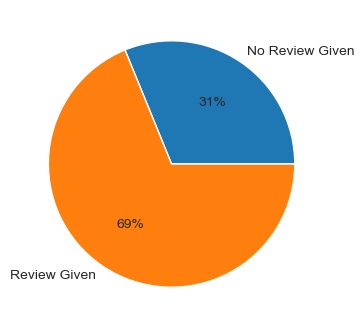

In [120]:
def chart_proportionOfWrittenReviews(df_agg, title):
    fig, ax = plt.subplots(figsize=(8,4));
    ax = plt.pie(df_agg['Count'], labels=df_agg['Review Given'], autopct='%.0f%%');
    return ax;

chart_proportionOfWrittenReviews(
    df_agg=get_countOfReviewGiven(df),
    title="Proportion of Reviewers that wrote reviews"
)

**Reviewers with the most reviews given**

**_Overall_**

In [139]:
def get_topReviewers_with_most_least_reviewsGiven(df, ascending, numReviewers):
    df_filter = df.sort_values(by='Total Reviews Given', ascending=ascending).head(numReviewers);
    df_filter = df_filter[df_filter.columns[:-2]];
    return df_filter;

get_topReviewers_with_most_least_reviewsGiven(
    df=df,
    ascending=False, 
    numReviewers=10
)


,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review
293,Alex Passini,Local Guide,2441,Very friendly staff and a great selection of c...,5,2019
311,Armando yaya,Local Guide,1090,love the coffee,5,2019
313,Ross Ferguson,Local Guide,873,It makes me feel like a princess.,4,2019
45,3 1 5 7 3,Local Guide,762,First time boxing Day purchase. No lineup. Had...,3,2022
187,john ozevin,Local Guide,570,Nuce coffe,5,2020
227,Oscar Aguilar,Local Guide,538,They didn't give us to try a cup of coffee.,3,2020
213,harold strempler,No Title,516,Have never darkened the door of this business....,1,2020
244,Ankit Mitra,Local Guide,476,A very well managed store to take care of all ...,4,2019
172,K. Dub,No Title,446,Good idea on the stores just wish that it was ...,4,2020
314,Greg Domville,Local Guide,402,Check it out. Period. I'm a coffee snob and th...,5,2019


**_Reviewers with No Title_**

In [141]:
get_topReviewers_with_most_least_reviewsGiven(
    df=df[df['Reviewer Title'] == "No Title"],
    ascending=False, 
    numReviewers=5
)

,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review
213,harold strempler,No Title,516,Have never darkened the door of this business....,1,2020
172,K. Dub,No Title,446,Good idea on the stores just wish that it was ...,4,2020
142,유길원,No Title,178,No Review,3,2020
31,Albert Leung,No Title,168,"Excellent service, explain details of trouble ...",4,2022
108,T D,No Title,114,Was promised a donated Nespresso machine for h...,1,2021


**_Reviewers with Local Guide status_**

In [142]:
get_topReviewers_with_most_least_reviewsGiven(
    df=df[df['Reviewer Title'] == "Local Guide"],
    ascending=False, 
    numReviewers=5
)

,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review
293,Alex Passini,Local Guide,2441,Very friendly staff and a great selection of c...,5,2019
311,Armando yaya,Local Guide,1090,love the coffee,5,2019
313,Ross Ferguson,Local Guide,873,It makes me feel like a princess.,4,2019
45,3 1 5 7 3,Local Guide,762,First time boxing Day purchase. No lineup. Had...,3,2022
187,john ozevin,Local Guide,570,Nuce coffe,5,2020


**_Reviewers that gave less than 3 star rating_**

In [144]:
get_topReviewers_with_most_least_reviewsGiven(
    df=df[df['Stars Given'] < 3],
    ascending=False, 
    numReviewers=5
)

,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review
213,harold strempler,No Title,516,Have never darkened the door of this business....,1,2020
305,Francis Li,Local Guide,396,I have been a long time Nespresso customer and...,1,2019
276,レーレヴィ,Local Guide,274,CSRs at this location are really rude and lazy...,1,2019
179,inspiringfoodie,Local Guide,220,Never thought buying coffee would be such a pr...,1,2020
322,Kevin Lee,Local Guide,151,Like another post said waited 30m. Was interes...,1,2019


**_Reviewers that gave less than 3 star rating after 2019_**

In [147]:
get_topReviewers_with_most_least_reviewsGiven(
    df=df[(df['Stars Given'] < 3) & (df['Year of Review'] > 2019)],
    ascending=False, 
    numReviewers=5
)

,Reviewer Name,Reviewer Title,Total Reviews Given,Review,Stars Given,Year of Review
213,harold strempler,No Title,516,Have never darkened the door of this business....,1,2020
179,inspiringfoodie,Local Guide,220,Never thought buying coffee would be such a pr...,1,2020
92,Calvin Ivy,Local Guide,138,This rating is specifically regarding the cust...,1,2021
39,MrMarcus,Local Guide,117,Coffee is good but not the customer service. G...,1,2022
108,T D,No Title,114,Was promised a donated Nespresso machine for h...,1,2021
